# Dubins Path Planning simulation results analyzer

This notebook is made to analyze the results produced by running the `DubinsFleetPlanner` on many test cases.

## Fetching data

In [1]:
# Import data manipulation libs

import pandas as pd
from pandas.core.groupby import DataFrameGroupBy
import numpy as np

In [2]:
# Select a source file

import io
import ipywidgets as widgets

uploader = widgets.FileUpload(
    accept='.csv',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

display(uploader)

FileUpload(value=(), accept='.csv', description='Upload')

In [3]:
uploaded_file = uploader.value[0]

data = pd.read_csv(io.BytesIO(uploaded_file.content),sep=';')
display(data)

,Test input,Iterations,Duration(ns),Threads,Possible paths,Initial guessed time,Final optained time,AC_Rows,AC_Num,is_formation,is_rng,Duration(ms),Successful
0,/home/mael/Programming/DubinsFleetPlanner/case...,300,5089939616,12,26,70.957265,150.382680,4,10,1,0,5089.939616,1
1,/home/mael/Programming/DubinsFleetPlanner/case...,25,281805105,12,26,82.457107,99.046557,4,10,1,0,281.805105,1
2,/home/mael/Programming/DubinsFleetPlanner/case...,90,816279600,12,26,78.458699,90.943211,4,10,1,0,816.279600,1
3,/home/mael/Programming/DubinsFleetPlanner/case...,46,592763596,12,26,104.622068,109.214532,4,10,1,0,592.763596,1
4,/home/mael/Programming/DubinsFleetPlanner/case...,300,3572238804,12,26,80.959415,117.385600,4,10,1,0,3572.238804,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97571,/home/mael/Programming/DubinsFleetPlanner/case...,300,3361082112,12,26,234.909351,704.728052,3,9,1,1,3361.082112,0
97572,/home/mael/Programming/DubinsFleetPlanner/case...,227,2531089116,12,26,223.276819,238.046235,3,9,1,1,2531.089116,1
97573,/home/mael/Programming/DubinsFleetPlanner/case...,300,3010089446,12,26,227.459583,262.613373,3,9,1,1,3010.089446,1
97574,/home/mael/Programming/DubinsFleetPlanner/case...,140,1324859910,12,26,61.133141,68.512724,3,9,1,1,1324.859910,1


In [4]:
ac_nums = data['AC_Num'].unique()
ac_nums.sort()
ac_nums

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])

In [5]:
full_rng_data = data[(data['is_rng'] == 1) & (data['is_formation'] == 0)]
full_formation_data = data[(data['is_rng'] == 0) & (data['is_formation'] == 1)]
rng_to_formation_data = data[(data['is_rng'] == 1) & (data['is_formation'] == 1)]

In [6]:
general_ac_grouped          = data.groupby(['AC_Num'])
full_rng_ac_grouped         = full_rng_data.groupby(['AC_Num'])
full_formation_ac_grouped   = full_formation_data.groupby(['AC_Num'])
rng_to_formation_ac_grouped = rng_to_formation_data.groupby(['AC_Num'])

print("Full RNG cases")
print(full_rng_ac_grouped["Test input"].count())

print("Formation cases")
print(full_formation_ac_grouped["Test input"].count())

print("RNG to formation cases")
print(rng_to_formation_ac_grouped["Test input"].count())

Full RNG cases
AC_Num
2     300
3     300
4     300
5     300
6     300
7     300
8     300
9     300
10    300
11    300
12    300
13    300
14    300
15    300
16    300
17    300
18    300
19    300
20    300
Name: Test input, dtype: int64
Formation cases
AC_Num
2     234
3     536
4     536
5     536
6     536
7     534
8     534
9     534
10    536
11    536
12    536
13    536
14    536
15    536
16    536
17    536
18    536
19    536
20    536
Name: Test input, dtype: int64
RNG to formation cases
AC_Num
2     2800
3     4400
4     4400
5     4400
6     4400
7     4400
8     4400
9     4400
10    4400
11    4400
12    4400
13    4400
14    4400
15    4400
16    4400
17    4400
18    4400
19    4400
20    4400
Name: Test input, dtype: int64


## Plotting

In [7]:

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib import colormaps

plt.rcParams['figure.figsize'] = [16, 9]
%matplotlib inline

### Success rate

/tmp/ipykernel_12114/3121120884.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


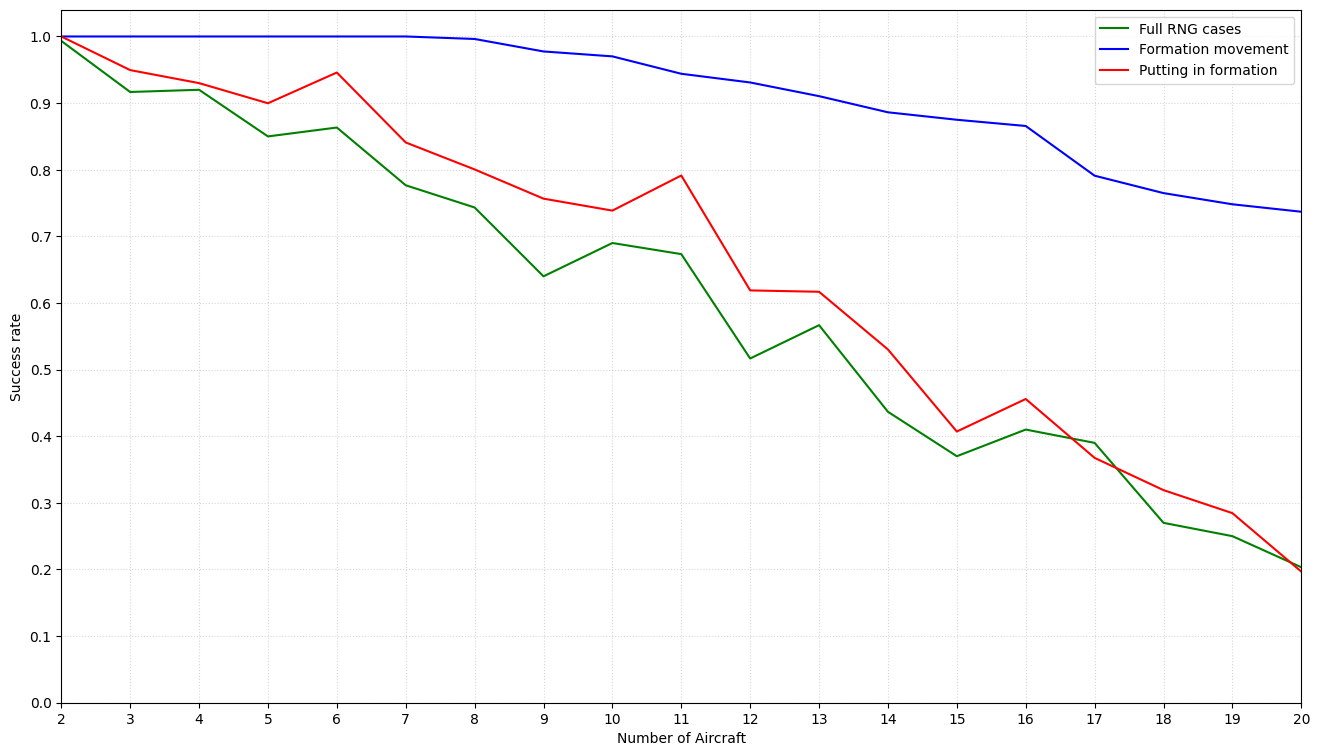

In [8]:
fig,ax = plt.subplots()

# general_rate = general_ac_grouped[['Successful']].mean().rename(columns={'Successful':'General rate'})
full_rng_rate = full_rng_ac_grouped[['Successful']].mean().rename(columns={'Successful':'Full RNG cases'})
full_formation_rate = full_formation_ac_grouped[['Successful']].mean().rename(columns={'Successful':'Formation movement'})
rng_to_formation_rate = rng_to_formation_ac_grouped[['Successful']].mean().rename(columns={'Successful':'Putting in formation'})

# general_rate.plot(kind='line',ax=ax,color='k')
full_rng_rate.plot(kind='line',ax=ax,color='g')
full_formation_rate.plot(kind='line',ax=ax,color='b')
rng_to_formation_rate.plot(kind='line',ax=ax,color='r')

ax.grid(True,'both','both',linestyle=':',alpha=0.5)

ax.set_xlabel('Number of Aircraft')
ax.set_xticks(
    ac_nums,
    ac_nums
)
ax.set_xlim(2,20)

ax.set_ylabel('Success rate')
ax.set_yticks(
    np.linspace(0,1,11)
)

ax.legend()

fig.show()

### Computation time

In [29]:
## Util functions

def extract_durations_from_groups(grouped:DataFrameGroupBy) -> tuple[np.ndarray,list[np.ndarray]]:
    keys = []
    durations = []
    
    for n,group in grouped:
        keys.append(n)
        durations.append(group['Duration(ms)'].to_numpy())
    
    return np.asarray(keys).flatten(),durations

def extract_durations_depending_success(grouped:DataFrameGroupBy) -> tuple[np.ndarray,list[np.ndarray],list[np.ndarray]]:
    
    keys = []
    durations_success = []
    durations_failure = []
    
    for n,group in grouped:
        keys.append(n)
        
        success = group["Successful"] == 1
        failure = group["Successful"] == 0
        
        durations_success.append(group[success]['Duration(ms)'].to_numpy())
        durations_failure.append(group[failure]['Duration(ms)'].to_numpy())
    
    return np.asarray(keys).flatten(),durations_success,durations_failure

def get_percentiles(durations:list[np.ndarray],qpercentiles:list[int]) -> np.ndarray:
    values = np.zeros((len(durations),len(qpercentiles)))
    
    for i,a in enumerate(durations):
        for j,q in enumerate(qpercentiles):
            values[i,j] = np.percentile(a,q)
    
    return values

def get_statdata(durations:list[np.ndarray]) -> tuple[np.ndarray,np.ndarray,np.ndarray,np.ndarray]:
    mins    = np.zeros(len(durations))
    maxs    = np.zeros(len(durations))
    means   = np.zeros(len(durations))
    sigmas  = np.zeros(len(durations))
    
    for i,a in enumerate(durations):
        mins[i]     = np.min(a)
        maxs[i]     = np.max(a)
        means[i]    = np.mean(a)
        sigmas[i]   = np.std(a)
        
    return mins,maxs,means,sigmas

/tmp/ipykernel_433569/2531228581.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


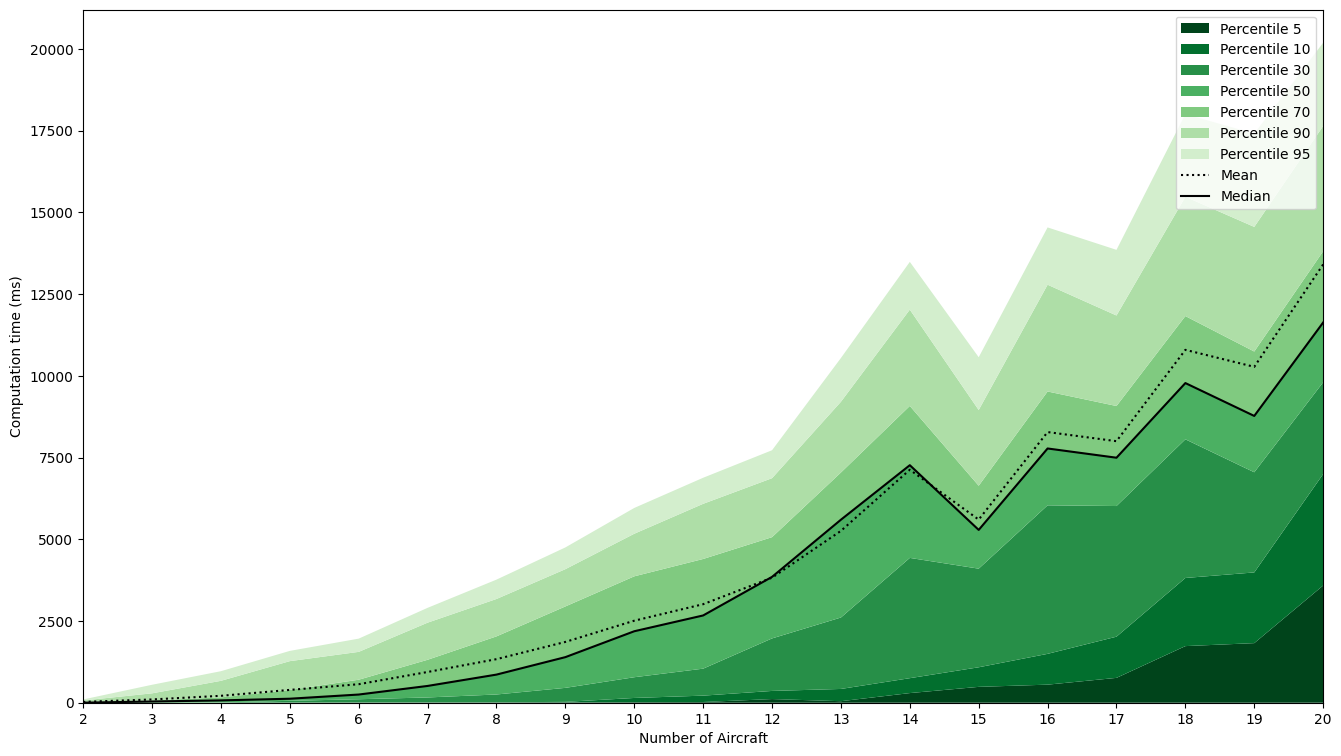

In [30]:
fig,ax = plt.subplots()

ac_nums,durations = extract_durations_from_groups(general_ac_grouped)

mins,maxs,means,sigmas = get_statdata(durations)

qpercentiles = [5,10,30,50,70,90,95]#,98]

percentiles = get_percentiles(durations,qpercentiles)
medians = percentiles[:,3]

diff_percentiles = np.diff(percentiles,prepend=0)

cmap = colormaps['Greens_r']
colors = cmap(np.linspace(0,0.8,len(qpercentiles)))

ax.stackplot(ac_nums,diff_percentiles.T,
             baseline='zero',
             colors=colors,
             labels=["Percentile " + str(q) for q in qpercentiles])

ax.plot(ac_nums,means,label='Mean',linestyle=':',color='k')
ax.plot(ac_nums,medians,label='Median',linestyle='-',color='k')

# ax.hlines([120000],0,22,linestyles='--',color='gray',label='Timeout')

ax.set_xlabel('Number of Aircraft')
ax.set_xticks(
    ac_nums,
    ac_nums
)
ax.set_xlim(2,20)

ax.set_ylabel('Computation time (ms)')

ax.legend()

fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_433569/2406772959.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


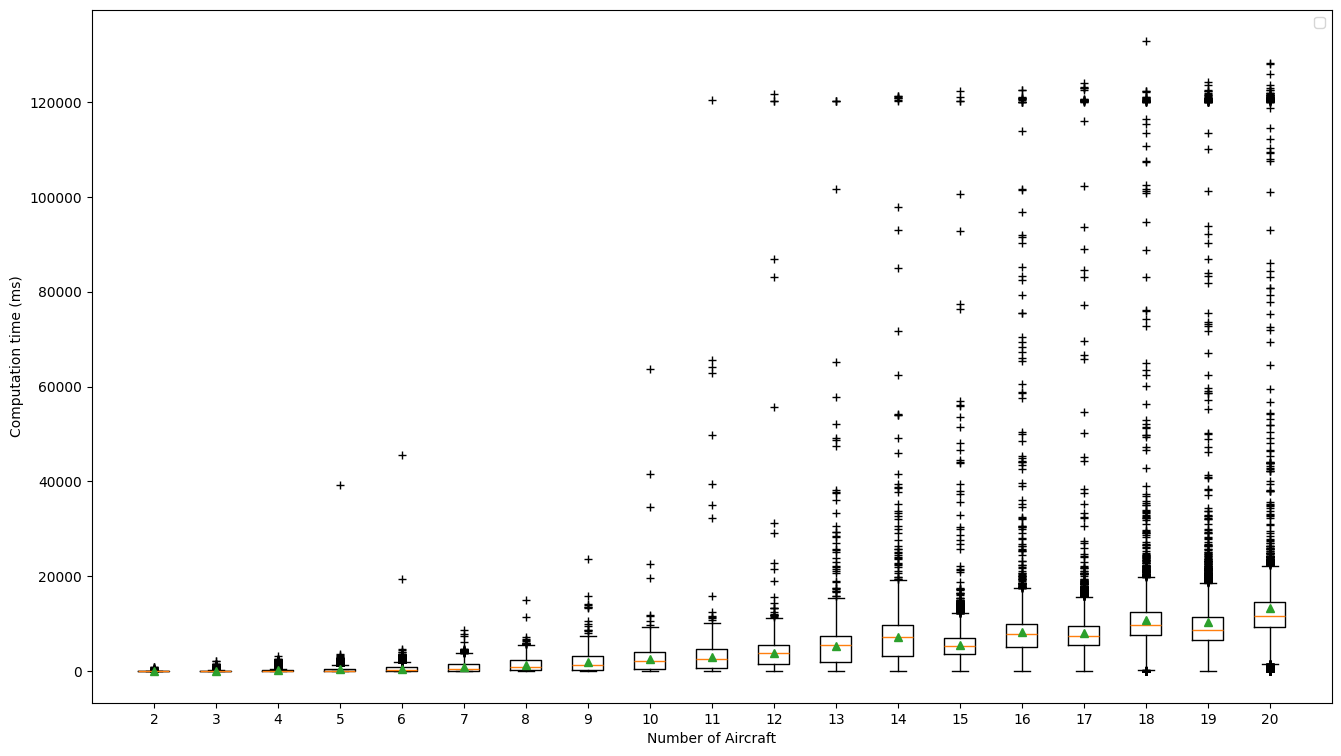

In [31]:
fig,ax = plt.subplots()

ax.boxplot(durations,showmeans=True,sym='k+',positions=ac_nums)

# ax.hlines([120000],0,22,linestyles=':',color='k',label='Timeout')

ax.set_xlabel('Number of Aircraft')
ax.set_xticks(
    ac_nums,
    ac_nums
)
ax.set_xlim(1,21)

ax.set_ylabel('Computation time (ms)')
# ax.set_ylim(0,10000)

ax.legend()

fig.show()

/tmp/ipykernel_433569/3770137529.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


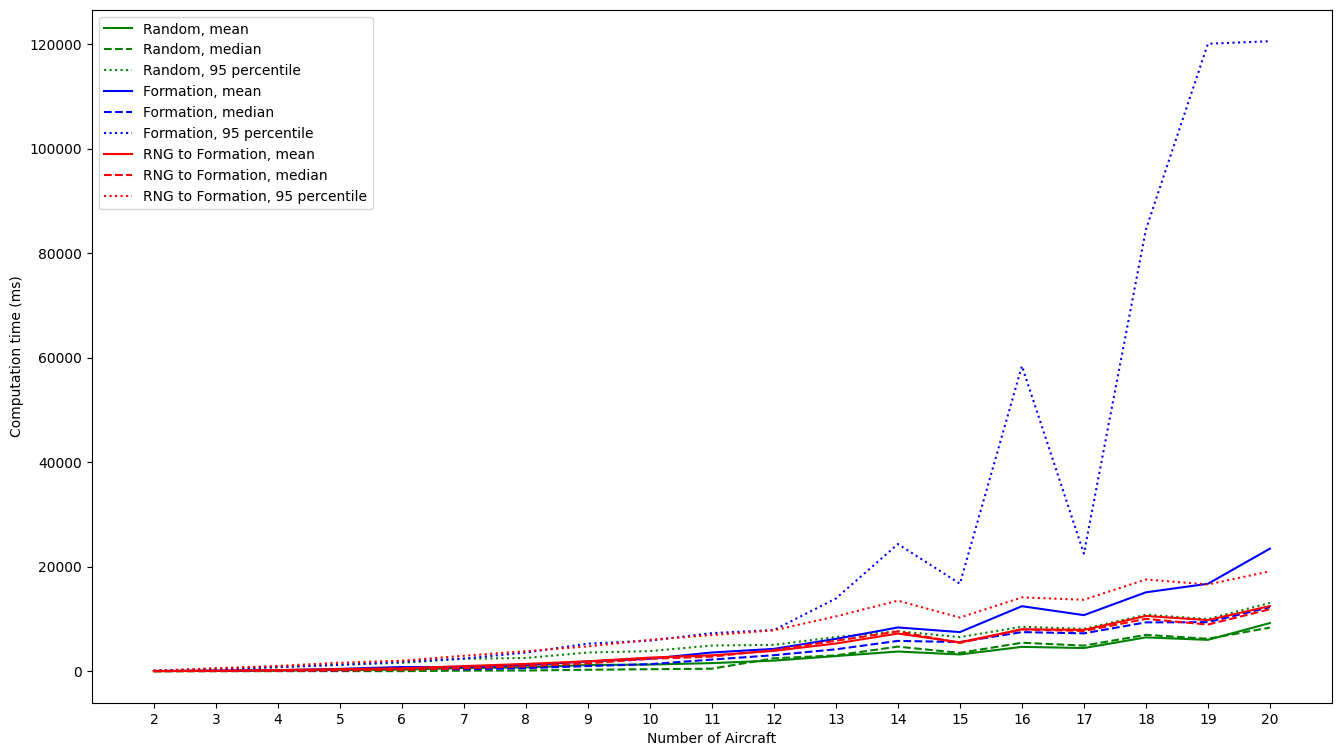

In [32]:
fig,ax = plt.subplots()


ac_nums_rng,durations_rng                       = extract_durations_from_groups(full_rng_ac_grouped)
ac_nums_formation,durations_formation           = extract_durations_from_groups(full_formation_ac_grouped)
ac_nums_rng_formation,durations_rng_formation   = extract_durations_from_groups(rng_to_formation_ac_grouped)

_,_,means_rng,_ = get_statdata(durations_rng)
_,_,means_formation,_ = get_statdata(durations_formation)
_,_,means_rng_formation,_ = get_statdata(durations_rng_formation)

qpercentiles = [5,10,30,50,70,90,95]#,98]

percentiles_rng = get_percentiles(durations_rng,qpercentiles)
medians_rng = percentiles_rng[:,3]
percentiles_formation = get_percentiles(durations_formation,qpercentiles)
medians_formation = percentiles_formation[:,3]
percentiles_rng_formation = get_percentiles(durations_rng_formation,qpercentiles)
medians_rng_formation = percentiles_rng_formation[:,3]

ax.plot(ac_nums_rng,means_rng               ,color='g', linestyle='-',  label='Random, mean')
ax.plot(ac_nums_rng,medians_rng             ,color='g', linestyle='--', label='Random, median')
ax.plot(ac_nums_rng,percentiles_rng[:,-1]   ,color='g', linestyle=':',  label=f'Random, {qpercentiles[-1]} percentile')

ax.plot(ac_nums_formation,means_formation               ,color='b', linestyle='-',  label='Formation, mean')
ax.plot(ac_nums_formation,medians_formation             ,color='b', linestyle='--', label='Formation, median')
ax.plot(ac_nums_formation,percentiles_formation[:,-1]   ,color='b', linestyle=':',  label=f'Formation, {qpercentiles[-1]} percentile')

ax.plot(ac_nums_rng_formation,means_rng_formation               ,color='r', linestyle='-',  label='RNG to Formation, mean')
ax.plot(ac_nums_rng_formation,medians_rng_formation             ,color='r', linestyle='--', label='RNG to Formation, median')
ax.plot(ac_nums_rng_formation,percentiles_rng_formation[:,-1]   ,color='r', linestyle=':',  label=f'RNG to Formation, {qpercentiles[-1]} percentile')

ax.set_xlabel('Number of Aircraft')
ax.set_xticks(
    ac_nums,
    ac_nums
)
ax.set_xlim(1,21)

ax.set_ylabel('Computation time (ms)')
# ax.set_ylim(0,10000)

ax.legend()

fig.show()

/tmp/ipykernel_433569/4245931731.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


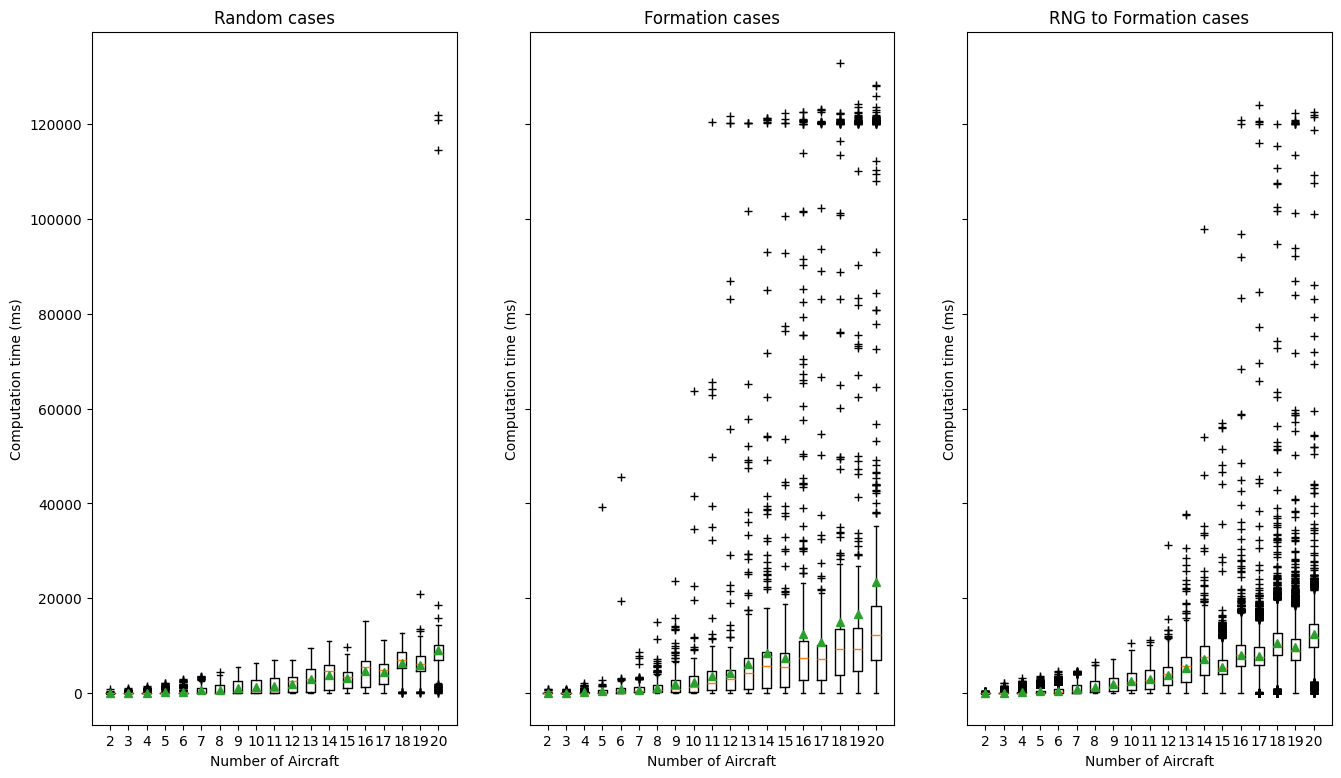

In [33]:
fig,axes = plt.subplots(1,3,sharey=True,sharex=True)


axes[0].boxplot(durations_rng,showmeans=True,sym='k+'           ,positions=ac_nums_rng)
axes[0].set_title("Random cases")
axes[1].boxplot(durations_formation,showmeans=True,sym='k+'     ,positions=ac_nums_formation)
axes[1].set_title("Formation cases")
axes[2].boxplot(durations_rng_formation,showmeans=True,sym='k+' ,positions=ac_nums_rng_formation)
axes[2].set_title("RNG to Formation cases")

# ax.hlines([120000],0,22,linestyles=':',color='k',label='Timeout')

for ax in axes:
    ax.set_xlabel('Number of Aircraft')
    ax.set_xticks(
        ac_nums,
        ac_nums
    )
    ax.set_xlim(1,21)

    ax.set_ylabel('Computation time (ms)')
    # ax.set_ylim(0,10000)


fig.show()

/tmp/ipykernel_433569/2055456374.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


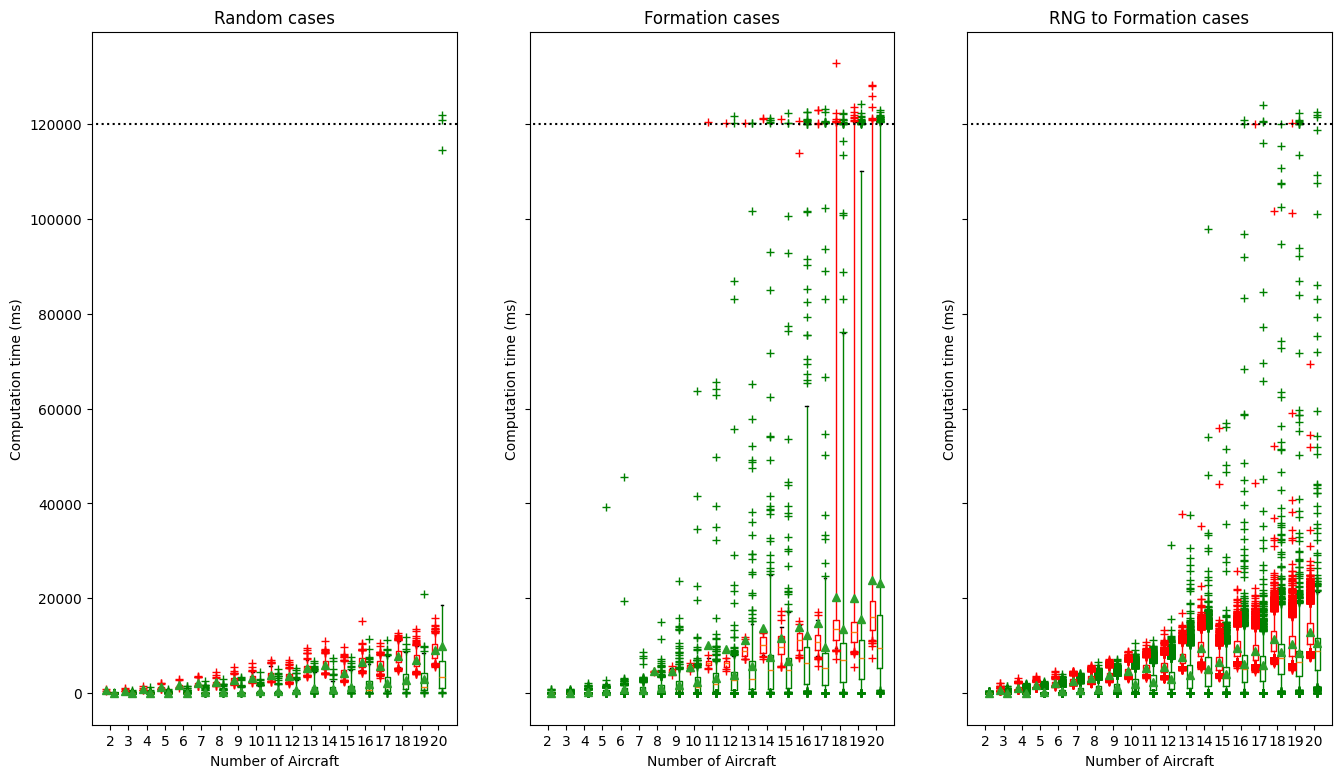

In [47]:
fig,axes = plt.subplots(1,3,sharey=True,sharex=True)


whiskerprops_success    = {"color":"green"}
boxprops_success        = {"color":"green"}
flierprops_success       = {"color":"green"}

whiskerprops_failure    = {"color":"red"}
boxprops_failure        = {"color":"red"}
flierprops_failure       = {"color":"red"}


ac_nums_rng,durations_rng_success,durations_rng_failure                                 = extract_durations_depending_success(full_rng_ac_grouped)
ac_nums_formation,durations_formation_success,durations_formation_failure               = extract_durations_depending_success(full_formation_ac_grouped)
ac_nums_rng_formation,durations_rng_formation_success,durations_rng_formation_failure   = extract_durations_depending_success(rng_to_formation_ac_grouped)

axes[0].boxplot(durations_rng_success,showmeans=True,sym='g+'           ,positions=ac_nums_rng+0.2,widths=0.30,whis=(5,95),
    whiskerprops=whiskerprops_success,boxprops=boxprops_success,flierprops=flierprops_success)
axes[0].boxplot(durations_rng_failure,showmeans=True,sym='r+'           ,positions=ac_nums_rng-0.2,widths=0.30,whis=(5,95),
    whiskerprops=whiskerprops_failure,boxprops=boxprops_failure,flierprops=flierprops_failure)
axes[0].set_title("Random cases")
axes[1].boxplot(durations_formation_success,showmeans=True,sym='g+'     ,positions=ac_nums_formation+0.2,widths=0.30,whis=(5,95),
    whiskerprops=whiskerprops_success,boxprops=boxprops_success,flierprops=flierprops_success)
axes[1].boxplot(durations_formation_failure,showmeans=True,sym='r+'     ,positions=ac_nums_formation-0.2,widths=0.30,whis=(5,95),
    whiskerprops=whiskerprops_failure,boxprops=boxprops_failure,flierprops=flierprops_failure)
axes[1].set_title("Formation cases")
axes[2].boxplot(durations_rng_formation_success,showmeans=True,sym='g+' ,positions=ac_nums_rng_formation+0.2,widths=0.30,whis=(5,95),
    whiskerprops=whiskerprops_success,boxprops=boxprops_success,flierprops=flierprops_success)
axes[2].boxplot(durations_rng_formation_failure,showmeans=True,sym='r+' ,positions=ac_nums_rng_formation-0.2,widths=0.30,whis=(5,95),
    whiskerprops=whiskerprops_failure,boxprops=boxprops_failure,flierprops=flierprops_failure)
axes[2].set_title("RNG to Formation cases")

for ax in axes:
    ax.set_xlabel('Number of Aircraft')
    ax.set_xticks(
        ac_nums,
        ac_nums
    )
    ax.set_xlim(1,21)

    ax.set_ylabel('Computation time (ms)')
    # ax.set_ylim(0,10000)

    ax.hlines([120000],0,22,linestyles=':',color='k',label='Timeout')

fig.show()